<a href="https://colab.research.google.com/github/cinumell/stock_price_prediction_Deep_Learning/blob/main/Time_Step_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price evaluation of a company at different time step values

### Evaluation by varying Time Step values

We create datasets by varying time steps
Time steps used are - 30, 40, 50, 70, 90

We used LTSM model to check the mean squared error for Oracle dataset. 

The Time step or Time window is the length of input we provide to the model, which consists of the latest k days' worth of stock price data, where k is the time step. As k is varied, the testing and training data error varies. Here, we can see that k=70 yielded the ideal number for both testing and training data, as well as a considerable reduction in baseline error. We thus picked k=70.


In [1]:
# Dataset download
import pandas_datareader as pr
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

company = 'ORCL'
price_type = 'close'

data = pr.get_data_tiingo(company, api_key="0f6351ae343427e511f4d085681db7e303ffb969")
data.to_csv(company+'.csv')

data = pd.read_csv(company+'.csv')

# Converting data to timeseries input

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]  
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

Prediction = list()

MError = list()
MTrain_size = list()
MTest_size = list()
MTrain_error = list()
MTest_error = list()


for step in [30, 40, 50, 70, 90]:

  # Baseline calculation


  Price = data[price_type]
  Means = list()

  for i in range(len(Price) - step):
    Means.append(sum(Price[i:i+step])/step)  

  Error = math.sqrt(mean_squared_error(Price[step:],Means))

  # MinMax Scalimg
  import numpy as np
  from sklearn.preprocessing import MinMaxScaler

  mms = MinMaxScaler(feature_range=(0,1))
  Price = mms.fit_transform(np.array(Price).reshape(-1,1))

  # Dataset split into train and test sets

  train_size = int(len(Price)*0.80)
  test_size = len(Price)-train_size
  train_data,test_data = Price[0:train_size,:],Price[train_size:len(Price),:1]
  
  # Converting data to timeseries input

  time_step = step
  trainX, trainY = create_dataset(train_data, time_step)
  testX, testY = create_dataset(test_data, time_step)

  trainX = trainX.reshape(trainX.shape[0],trainX.shape[1] , 1)
  testX = testX.reshape(testX.shape[0],testX.shape[1] , 1)

  # Stacked LSTM model

  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import LSTM
  from tensorflow.keras.layers import Dense

  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (step, 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))

  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')

  #Training the model
  model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=64,verbose=1)

  # Prediction and error calculation

  train_predict = model.predict(trainX)
  test_predict = model.predict(testX)

  testY = testY.reshape(test_size-step-1,1)
  trainY = trainY.reshape(train_size-step-1,1)

  testY = mms.inverse_transform(testY)
  trainY = mms.inverse_transform(trainY)


  train_predict = mms.inverse_transform(train_predict)
  test_predict = mms.inverse_transform(test_predict)


  MError.append(Error)
  MTrain_size.append(train_size-step-1)
  MTest_size.append(test_size-step-1)
  MTrain_error.append(math.sqrt(mean_squared_error(trainY,train_predict)))
  MTest_error.append(math.sqrt(mean_squared_error(testY,test_predict)))
  Prediction.append(test_predict)



/var/folders/p6/vpj9j15x7774phthzn6s023m0000gn/T/ipykernel_19447/900591216.py:11: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pr.get_data_tiingo(company, api_key="0f6351ae343427e511f4d085681db7e303ffb969")


Metal device set to: Apple M1 Pro


2022-12-02 19:25:35.193966: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-02 19:25:35.194110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2022-12-02 19:25:35.783576: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-02 19:25:37.154685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:25:37.306064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:25:37.533110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:25:37.703300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/16 [>.............................] - ETA: 36s - loss: 0.1788

2022-12-02 19:25:38.035752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 0.0281

2022-12-02 19:25:39.456700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:25:39.515625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:25:39.578473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 108ms/step - loss: 0.0281 - val_loss: 0.0070
Epoch 2/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 3/100
16/16 [==============================] - 1s 32ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 4/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 5/100
16/16 [==============================] - 0s 30ms/step - loss: 9.5708e-04 - val_loss: 0.0032
Epoch 6/100
16/16 [==============================] - 0s 29ms/step - loss: 9.3704e-04 - val_loss: 0.0030
Epoch 7/100
16/16 [==============================] - 0s 30ms/step - loss: 9.9992e-04 - val_loss: 0.0029
Epoch 8/100
16/16 [==============================] - 1s 36ms/step - loss: 9.3137e-04 - val_loss: 0.0030
Epoch 9/100
16/16 [==============================] - 0s 28ms/step - loss: 8.9779e-04 - val_loss: 0.0027
Epoch 10/100
16/16 [==============================] - 1s 36ms/step - loss: 9.0209e-04 - val

Epoch 79/100
16/16 [==============================] - 0s 31ms/step - loss: 3.1227e-04 - val_loss: 7.8947e-04
Epoch 80/100
16/16 [==============================] - 1s 32ms/step - loss: 3.6631e-04 - val_loss: 7.4515e-04
Epoch 81/100
16/16 [==============================] - 0s 31ms/step - loss: 3.1373e-04 - val_loss: 7.9099e-04
Epoch 82/100
16/16 [==============================] - 0s 31ms/step - loss: 3.0038e-04 - val_loss: 9.0454e-04
Epoch 83/100
16/16 [==============================] - 0s 31ms/step - loss: 3.1041e-04 - val_loss: 0.0011
Epoch 84/100
16/16 [==============================] - 1s 32ms/step - loss: 3.5397e-04 - val_loss: 7.1404e-04
Epoch 85/100
16/16 [==============================] - 0s 31ms/step - loss: 3.0237e-04 - val_loss: 7.2029e-04
Epoch 86/100
16/16 [==============================] - 0s 31ms/step - loss: 3.1047e-04 - val_loss: 8.6238e-04
Epoch 87/100
16/16 [==============================] - 0s 31ms/step - loss: 2.9012e-04 - val_loss: 6.7394e-04
Epoch 88/100
16/16 [===

2022-12-02 19:26:30.203814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:26:30.257855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:26:30.329813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 24ms/step
Epoch 1/100


2022-12-02 19:26:33.046337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:26:33.204592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:26:33.319035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:26:33.454779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/16 [>.............................] - ETA: 34s - loss: 0.1757

2022-12-02 19:26:33.649502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 0.0259

2022-12-02 19:26:35.633395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:26:35.692797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:26:35.771588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 5s 148ms/step - loss: 0.0259 - val_loss: 0.0042
Epoch 2/100
16/16 [==============================] - 1s 39ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 3/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 4/100
16/16 [==============================] - 1s 36ms/step - loss: 9.3539e-04 - val_loss: 0.0028
Epoch 5/100
16/16 [==============================] - 1s 36ms/step - loss: 8.7233e-04 - val_loss: 0.0032
Epoch 6/100
16/16 [==============================] - 1s 38ms/step - loss: 9.4537e-04 - val_loss: 0.0027
Epoch 7/100
16/16 [==============================] - 1s 36ms/step - loss: 9.1175e-04 - val_loss: 0.0025
Epoch 8/100
16/16 [==============================] - 1s 37ms/step - loss: 8.4181e-04 - val_loss: 0.0025
Epoch 9/100
16/16 [==============================] - 1s 36ms/step - loss: 8.1951e-04 - val_loss: 0.0023
Epoch 10/100
16/16 [==============================] - 1s 37ms/step - loss: 8.1197e-04 -

Epoch 79/100
16/16 [==============================] - 1s 36ms/step - loss: 3.8139e-04 - val_loss: 7.7086e-04
Epoch 80/100
16/16 [==============================] - 1s 37ms/step - loss: 3.3408e-04 - val_loss: 8.5637e-04
Epoch 81/100
16/16 [==============================] - 1s 36ms/step - loss: 3.1295e-04 - val_loss: 7.4912e-04
Epoch 82/100
16/16 [==============================] - 1s 36ms/step - loss: 3.2662e-04 - val_loss: 7.4671e-04
Epoch 83/100
16/16 [==============================] - 1s 37ms/step - loss: 3.1726e-04 - val_loss: 9.0522e-04
Epoch 84/100
16/16 [==============================] - 1s 36ms/step - loss: 3.5921e-04 - val_loss: 0.0012
Epoch 85/100
16/16 [==============================] - 1s 36ms/step - loss: 3.2183e-04 - val_loss: 7.3098e-04
Epoch 86/100
16/16 [==============================] - 1s 35ms/step - loss: 2.9472e-04 - val_loss: 8.8511e-04
Epoch 87/100
16/16 [==============================] - 1s 35ms/step - loss: 3.0740e-04 - val_loss: 6.9837e-04
Epoch 88/100
16/16 [===

2022-12-02 19:27:33.516320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:27:33.568818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:27:33.653108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 30ms/step
Epoch 1/100


2022-12-02 19:27:36.111339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:27:36.258204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:27:36.456081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:27:36.615474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/15 [=>............................] - ETA: 30s - loss: 0.1375

2022-12-02 19:27:36.848641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 0.0276

2022-12-02 19:27:38.811714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:27:38.873130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:27:38.968201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 5s 176ms/step - loss: 0.0276 - val_loss: 0.0151
Epoch 2/100
15/15 [==============================] - 1s 45ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 3/100
15/15 [==============================] - 1s 42ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 4/100
15/15 [==============================] - 1s 43ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 5/100
15/15 [==============================] - 1s 42ms/step - loss: 9.3944e-04 - val_loss: 0.0028
Epoch 6/100
15/15 [==============================] - 1s 42ms/step - loss: 8.8209e-04 - val_loss: 0.0028
Epoch 7/100
15/15 [==============================] - 1s 42ms/step - loss: 8.6831e-04 - val_loss: 0.0029
Epoch 8/100
15/15 [==============================] - 1s 40ms/step - loss: 8.5730e-04 - val_loss: 0.0027
Epoch 9/100
15/15 [==============================] - 1s 42ms/step - loss: 8.5021e-04 - val_loss: 0.0026
Epoch 10/100
15/15 [==============================] - 1s 42ms/step - loss: 8.2318e-04 - val

15/15 [==============================] - 1s 38ms/step - loss: 3.1238e-04 - val_loss: 9.6290e-04
Epoch 79/100
15/15 [==============================] - 1s 38ms/step - loss: 3.0549e-04 - val_loss: 7.2240e-04
Epoch 80/100
15/15 [==============================] - 1s 37ms/step - loss: 3.0947e-04 - val_loss: 0.0011
Epoch 81/100
15/15 [==============================] - 1s 37ms/step - loss: 2.9977e-04 - val_loss: 7.0190e-04
Epoch 82/100
15/15 [==============================] - 1s 38ms/step - loss: 2.8755e-04 - val_loss: 7.2718e-04
Epoch 83/100
15/15 [==============================] - 1s 38ms/step - loss: 3.0696e-04 - val_loss: 8.3696e-04
Epoch 84/100
15/15 [==============================] - 1s 38ms/step - loss: 2.8664e-04 - val_loss: 9.0301e-04
Epoch 85/100
15/15 [==============================] - 1s 38ms/step - loss: 3.2543e-04 - val_loss: 6.8923e-04
Epoch 86/100
15/15 [==============================] - 1s 38ms/step - loss: 2.8115e-04 - val_loss: 7.0194e-04
Epoch 87/100
15/15 [================

2022-12-02 19:28:37.735320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:28:37.783080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:28:37.887575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 36ms/step
Epoch 1/100


2022-12-02 19:28:40.731588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:28:40.888714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:28:41.020252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:28:41.205278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:28:41.467952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 0.0161

2022-12-02 19:28:43.200080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:28:43.254404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:28:43.364296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 5s 144ms/step - loss: 0.0161 - val_loss: 0.0041
Epoch 2/100
15/15 [==============================] - 1s 47ms/step - loss: 0.0022 - val_loss: 0.0053
Epoch 3/100
15/15 [==============================] - 1s 48ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 4/100
15/15 [==============================] - 1s 47ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 5/100
15/15 [==============================] - 1s 47ms/step - loss: 9.7987e-04 - val_loss: 0.0028
Epoch 6/100
15/15 [==============================] - 1s 48ms/step - loss: 9.0327e-04 - val_loss: 0.0028
Epoch 7/100
15/15 [==============================] - 1s 46ms/step - loss: 8.6570e-04 - val_loss: 0.0026
Epoch 8/100
15/15 [==============================] - 1s 46ms/step - loss: 8.6200e-04 - val_loss: 0.0026
Epoch 9/100
15/15 [==============================] - 1s 46ms/step - loss: 8.2201e-04 - val_loss: 0.0024
Epoch 10/100
15/15 [==============================] - 1s 47ms/step - loss: 8.4550e-04 - val

15/15 [==============================] - 1s 47ms/step - loss: 2.9443e-04 - val_loss: 8.1390e-04
Epoch 79/100
15/15 [==============================] - 1s 45ms/step - loss: 3.0594e-04 - val_loss: 7.8203e-04
Epoch 80/100
15/15 [==============================] - 1s 45ms/step - loss: 3.3652e-04 - val_loss: 9.5173e-04
Epoch 81/100
15/15 [==============================] - 1s 46ms/step - loss: 3.7691e-04 - val_loss: 7.8889e-04
Epoch 82/100
15/15 [==============================] - 1s 45ms/step - loss: 2.7454e-04 - val_loss: 6.8707e-04
Epoch 83/100
15/15 [==============================] - 1s 45ms/step - loss: 2.6619e-04 - val_loss: 6.6304e-04
Epoch 84/100
15/15 [==============================] - 1s 49ms/step - loss: 2.7506e-04 - val_loss: 6.2157e-04
Epoch 85/100
15/15 [==============================] - 1s 50ms/step - loss: 2.7340e-04 - val_loss: 7.9689e-04
Epoch 86/100
15/15 [==============================] - 1s 47ms/step - loss: 2.8237e-04 - val_loss: 5.9155e-04
Epoch 87/100
15/15 [============

2022-12-02 19:29:52.551735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:29:52.600574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:29:52.719420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 54ms/step
Epoch 1/100


2022-12-02 19:29:56.124688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:29:56.266027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:29:56.462883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:29:56.671820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:29:57.015566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 0.0231

2022-12-02 19:29:59.204881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:29:59.256476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:29:59.405350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 5s 180ms/step - loss: 0.0231 - val_loss: 0.0052
Epoch 2/100
15/15 [==============================] - 1s 68ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 3/100
15/15 [==============================] - 1s 56ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 4/100
15/15 [==============================] - 1s 57ms/step - loss: 8.6753e-04 - val_loss: 0.0029
Epoch 5/100
15/15 [==============================] - 1s 57ms/step - loss: 8.5356e-04 - val_loss: 0.0030
Epoch 6/100
15/15 [==============================] - 1s 57ms/step - loss: 8.4519e-04 - val_loss: 0.0028
Epoch 7/100
15/15 [==============================] - 1s 57ms/step - loss: 8.6221e-04 - val_loss: 0.0028
Epoch 8/100
15/15 [==============================] - 1s 55ms/step - loss: 8.4952e-04 - val_loss: 0.0030
Epoch 9/100
15/15 [==============================] - 1s 56ms/step - loss: 8.0907e-04 - val_loss: 0.0027
Epoch 10/100
15/15 [==============================] - 1s 56ms/step - loss: 7.9865e-04 -

15/15 [==============================] - 1s 53ms/step - loss: 3.9514e-04 - val_loss: 8.8252e-04
Epoch 80/100
15/15 [==============================] - 1s 67ms/step - loss: 3.5956e-04 - val_loss: 9.0369e-04
Epoch 81/100
15/15 [==============================] - 1s 51ms/step - loss: 3.5272e-04 - val_loss: 8.6804e-04
Epoch 82/100
15/15 [==============================] - 1s 51ms/step - loss: 3.4675e-04 - val_loss: 8.8259e-04
Epoch 83/100
15/15 [==============================] - 1s 50ms/step - loss: 3.2831e-04 - val_loss: 8.5371e-04
Epoch 84/100
15/15 [==============================] - 1s 55ms/step - loss: 3.7005e-04 - val_loss: 8.3347e-04
Epoch 85/100
15/15 [==============================] - 1s 50ms/step - loss: 3.3234e-04 - val_loss: 8.2696e-04
Epoch 86/100
15/15 [==============================] - 1s 51ms/step - loss: 3.5757e-04 - val_loss: 9.3422e-04
Epoch 87/100
15/15 [==============================] - 1s 50ms/step - loss: 3.2368e-04 - val_loss: 8.2091e-04
Epoch 88/100
15/15 [============

2022-12-02 19:31:19.101564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:31:19.145277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 19:31:19.289993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 271ms/step


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 90, 128)           66560     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 25)                1625      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
For step: 30
Baseline error: 3.3881582289144303
Train size: 976
Test size: 221
Train error: 1.0017749111382948
Test error: 1.6021028207979848
For step: 40
Baseline error: 3.7809590

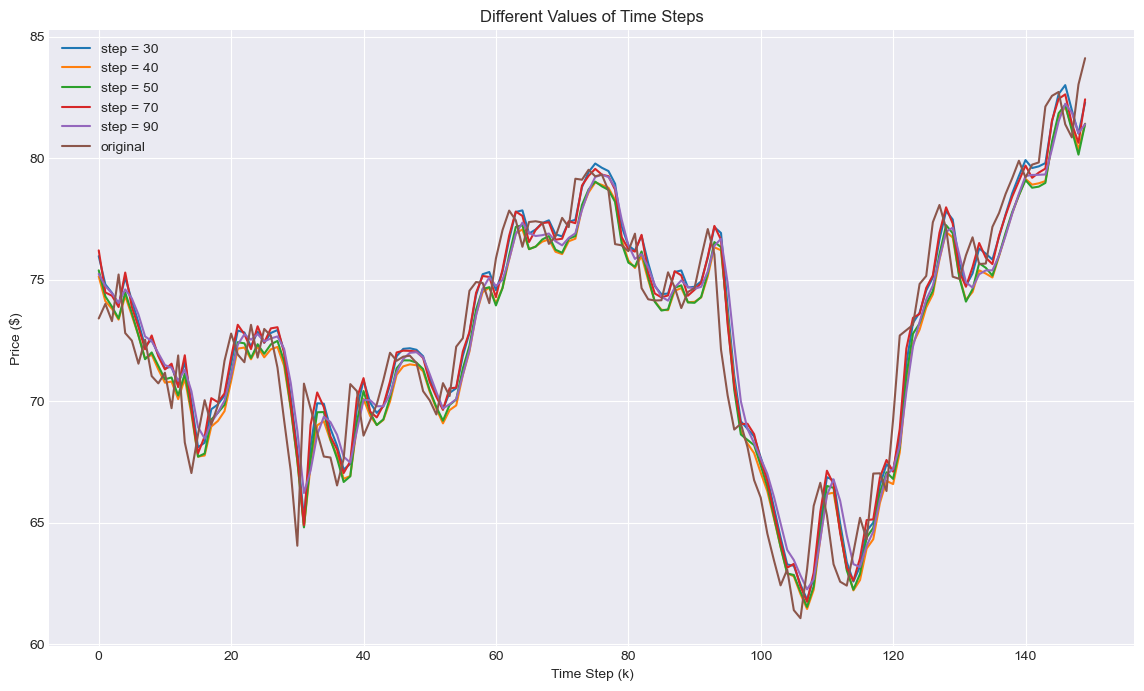

In [2]:
model.summary()
steps = [30, 40, 50, 70, 90]
for i in range(len(steps)):
  print("For step:",steps[i])
  print("Baseline error:",MError[i])
  print("Train size:",MTrain_size[i])
  print("Test size:",MTest_size[i])
  print("Train error:",MTrain_error[i])
  print("Test error:",MTest_error[i])

plt.style.use('seaborn-darkgrid')
fig,ax = plt.subplots(figsize=(14,8))
plt.title("Different Values of Time Steps")
#Customize
ax.set(title=f'Different Values of Time Steps', 
       xlabel='Time Step (k)',
       ylabel='Price ($)')

ax.plot(Prediction[0][-150:],label = "step = 30")
ax.plot(Prediction[1][-150:],label = "step = 40")
ax.plot(Prediction[2][-150:],label = "step = 50")
ax.plot(Prediction[3][-150:],label = "step = 70")
ax.plot(Prediction[4][-150:],label = "step = 90")
ax.plot(testY[-150:],label = "original")
ax.legend()